# It's Raining Bells, Hallelujah!

<img src="https://mcsun.org/wp-content/uploads/2020/05/Banner-Animal-Crossing-New-Horizons.jpg">

## A guide to living large in Animal Crossing: New Horizons

### by Kwame V. Taylor

It's Raining Bells, Hallelujah is data-driven guide to getting rich and staying rich with maximized efficiency on the Nintendo Switch video game, Animal Crossing: New Horizons.

Bells are the currency used in the video game, Animal Crossing: New Horizons. Users can buy and sell items using bells, as well as exchange bells and items with both in-game characters (also known as Non-Playable Characters, or NPCs) and other users.

### Set up environment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# default viz size settings
plt.rc('figure', figsize=(9, 7))
plt.rc('font', size=13)

### Acquire data

Let's look at insects first, since I already know that people love to bank big on catching tarantulas and scorpions.

In [2]:
insects = pd.read_csv('insects.csv')

In [3]:
insects.sort_values(by="Sell", ascending=False).head(6)

,#,Name,Sell,Where/How,Weather,Total Catches to Unlock,Spawn Rates,NH Jan,NH Feb,NH Mar,...,SH Oct,SH Nov,SH Dec,Color 1,Color 2,Icon Filename,Critterpedia Filename,Furniture Filename,Internal ID,Unique Entry ID
29,61,giraffe stag,12000,On palm trees,Any weather,100,1,NaN,NaN,NaN,...,NaN,NaN,NaN,Black,Black,Ins77,InsectGirafanokogirikuwagata,FtrInsectGirafanokogirikuwagata,3482,PSChjzMhGwhnsHTs4
30,60,golden stag,12000,On palm trees,Any weather,100,1,NaN,NaN,NaN,...,NaN,NaN,NaN,Black,Yellow,Ins50,InsectOugononikuwagata,FtrInsectOugononikuwagata,638,2C8cSphidFCBPxYEe
39,65,horned hercules,12000,On palm trees,Any weather,100,1,NaN,NaN,NaN,...,NaN,NaN,NaN,Yellow,Black,Ins54,InsectHerakuresuohkabuto,FtrInsectHerakuresuohkabuto,600,TqhEomNEMDZ2wcTpk
65,52,scarab beetle,10000,On trees (any kind),Any weather,50,3,NaN,NaN,NaN,...,NaN,NaN,NaN,Black,Beige,Ins43,InsectPurachinakogane,FtrInsectPurachinakogane,639,2HXdFD8s6BmYYMf4u
27,57,giant stag,10000,On trees (any kind),Any weather,50,5,NaN,NaN,NaN,...,NaN,NaN,NaN,Black,Black,Ins47,InsectOhkuwagata,FtrInsectOhkuwagata,637,KhrTLzayFz23zz2kn
31,54,goliath beetle,8000,On palm trees,Any weather,100,2,NaN,NaN,NaN,...,NaN,NaN,5 PM – 8 AM,Red,Black,Ins55,InsectGoraiasuohtsunohanamuguri,FtrInsectGoraiasuohtsunohanamuguri,596,wZQMZfhtRyPFAapmF


### Prepare data

First I'll set the index to #.

In [4]:
insects = insects.set_index('#')

Then I'll drop some of the columns I won't be using.

In [5]:
insects = insects.drop(columns=['Icon Filename', 'Critterpedia Filename', 'Furniture Filename',
       'Internal ID', 'Unique Entry ID'])

And impute NaNs with 0s.

In [6]:
insects = insects.fillna(0)

In [7]:
insects.isna().sum()

Name                       0
Sell                       0
Where/How                  0
Weather                    0
Total Catches to Unlock    0
Spawn Rates                0
NH Jan                     0
NH Feb                     0
NH Mar                     0
NH Apr                     0
NH May                     0
NH Jun                     0
NH Jul                     0
NH Aug                     0
NH Sep                     0
NH Oct                     0
NH Nov                     0
NH Dec                     0
SH Jan                     0
SH Feb                     0
SH Mar                     0
SH Apr                     0
SH May                     0
SH Jun                     0
SH Jul                     0
SH Aug                     0
SH Sep                     0
SH Oct                     0
SH Nov                     0
SH Dec                     0
Color 1                    0
Color 2                    0
dtype: int64

Now I'll check data types.

In [8]:
insects.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 10 to 2
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Name                     80 non-null     object
 1   Sell                     80 non-null     int64 
 2   Where/How                80 non-null     object
 3   Weather                  80 non-null     object
 4   Total Catches to Unlock  80 non-null     int64 
 5   Spawn Rates              80 non-null     object
 6   NH Jan                   80 non-null     object
 7   NH Feb                   80 non-null     object
 8   NH Mar                   80 non-null     object
 9   NH Apr                   80 non-null     object
 10  NH May                   80 non-null     object
 11  NH Jun                   80 non-null     object
 12  NH Jul                   80 non-null     object
 13  NH Aug                   80 non-null     object
 14  NH Sep                   80 non-null     obj

Spawn Rates needs to be an integer.

In [9]:
insects['Spawn Rates'].value_counts()

5       11
2        8
30       7
10       7
50       6
20       6
40       6
60       6
1        4
70       4
0        3
35       2
15       2
7        2
25       2
80       1
200      1
3        1
5–10     1
Name: Spawn Rates, dtype: int64

Because one of the values is a range, I'm going to make it the average of the start and end values rounded to the nearest integer, which is 8.

In [10]:
insects['Spawn Rates'] = insects['Spawn Rates'].where(insects['Spawn Rates'] != '5–10', 8).astype(int)

In [11]:
insects['Spawn Rates'].value_counts()

5      11
2       8
10      7
30      7
20      6
60      6
50      6
40      6
70      4
1       4
0       3
15      2
7       2
25      2
35      2
8       1
200     1
3       1
80      1
Name: Spawn Rates, dtype: int64

In [12]:
insects.head(3)

,Name,Sell,Where/How,Weather,Total Catches to Unlock,Spawn Rates,NH Jan,NH Feb,NH Mar,NH Apr,...,SH May,SH Jun,SH Jul,SH Aug,SH Sep,SH Oct,SH Nov,SH Dec,Color 1,Color 2
#,,,,,,,,,,,,,,,,,,,,,
10,agrias butterfly,3000,Flying near flowers,Any except rain,20,5,0,0,0,8 AM – 5 PM,...,0,0,0,0,0,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,Pink,Green
69,ant,80,On rotten turnips,Any weather,0,0,All day,All day,All day,All day,...,All day,All day,All day,All day,All day,All day,All day,All day,Black,White
14,Atlas moth,3000,On trees (any kind),Any weather,20,5,0,0,0,7 PM – 4 AM,...,0,0,0,0,0,7 PM – 4 AM,7 PM – 4 AM,7 PM – 4 AM,Orange,Yellow


Looks cleaned up enough to head into data exploration.

### Feature Engineering

Idea for feature engineering: Spawn Rates / Sell

In [13]:
insects["SpawnRateSell"] = insects['Spawn Rates'] / insects.Sell

# plus 1 for now to prevent divide by zero error for MVP, but later I will update to conditionally check for zero

### Exploratory Data Analysis

In [14]:
insects.describe()

,Sell,Total Catches to Unlock,Spawn Rates,SpawnRateSell
count,80.000000,80.00000,80.000000,80.000000
mean,2220.500000,17.50000,26.375000,0.102238
std,3209.388877,30.08427,29.890253,0.144001
min,10.000000,0.00000,0.000000,0.000000
25%,237.500000,0.00000,5.000000,0.001667
50%,600.000000,0.00000,20.000000,0.025463
75%,2625.000000,20.00000,40.000000,0.154167
max,12000.000000,100.00000,200.000000,0.666667


In [15]:
moth_avg = insects[insects['Name'].str.contains('moth')].Sell.mean()
butterfly_avg = insects[insects['Name'].str.contains('butterfly')].Sell.mean()
beetle_avg = insects[insects['Name'].str.contains('beetle')].Sell.mean()
dragonfly_avg = insects[insects['Name'].str.contains('dragonfly')].Sell.mean()
stag_avg = insects[insects['Name'].str.contains('stag')].Sell.mean()
cicada_avg = insects[insects['Name'].str.contains('cicada')].Sell.mean()
horned_avg = insects[insects['Name'].str.contains('horned')].Sell.mean()
cricket_avg = insects[insects['Name'].str.contains('cricket')].Sell.mean()

Text(0, 0.5, 'Bells')

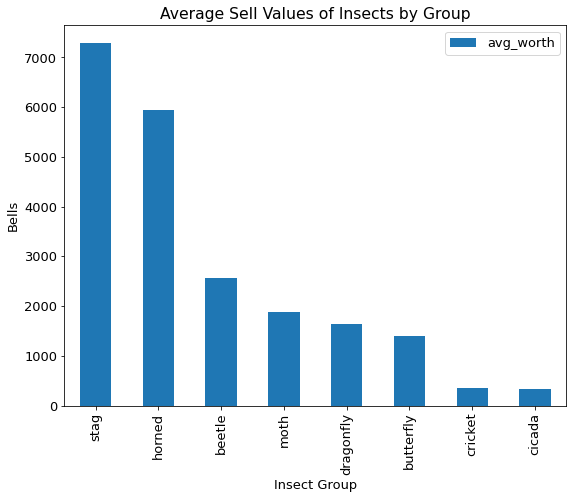

In [16]:
avg_worth_by_group_insects = pd.DataFrame([moth_avg, butterfly_avg, beetle_avg, dragonfly_avg, stag_avg, cicada_avg, horned_avg, cricket_avg], 
                                          ['moth', 'butterfly', 'beetle', 'dragonfly', 'stag', 'cicada', 'horned', 'cricket'])
avg_worth_by_group_insects = avg_worth_by_group_insects.rename(columns={0: "avg_worth"})

avg_worth_by_group_insects.sort_values(by="avg_worth", ascending=False).plot.bar()
plt.title("Average Sell Values of Insects by Group")
plt.xlabel("Insect Group")
plt.ylabel("Bells")

In [17]:
insects.columns

Index(['Name', 'Sell', 'Where/How', 'Weather', 'Total Catches to Unlock',
       'Spawn Rates', 'NH Jan', 'NH Feb', 'NH Mar', 'NH Apr', 'NH May',
       'NH Jun', 'NH Jul', 'NH Aug', 'NH Sep', 'NH Oct', 'NH Nov', 'NH Dec',
       'SH Jan', 'SH Feb', 'SH Mar', 'SH Apr', 'SH May', 'SH Jun', 'SH Jul',
       'SH Aug', 'SH Sep', 'SH Oct', 'SH Nov', 'SH Dec', 'Color 1', 'Color 2',
       'SpawnRateSell'],
      dtype='object')

Text(0, 0.5, 'Adjusted Value in Bells')

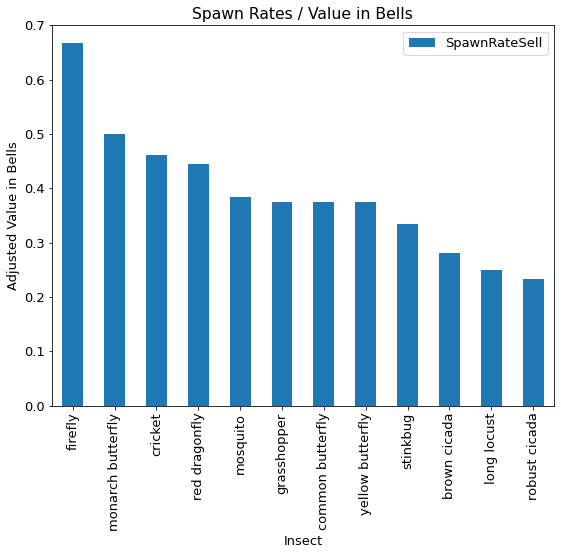

In [18]:
insects[["SpawnRateSell", 'Name']].set_index('Name').sort_values(by="SpawnRateSell", ascending=False).head(12).plot.bar()

plt.title("Spawn Rates / Value in Bells")
plt.xlabel("Insect")
plt.ylabel("Adjusted Value in Bells")

In [19]:
insects.sort_values(by="Spawn Rates", ascending=False).head(27)

,Name,Sell,Where/How,Weather,Total Catches to Unlock,Spawn Rates,NH Jan,NH Feb,NH Mar,NH Apr,...,SH Jun,SH Jul,SH Aug,SH Sep,SH Oct,SH Nov,SH Dec,Color 1,Color 2,SpawnRateSell
#,,,,,,,,,,,,,,,,,,,,,
36,firefly,300,Flying near water,Any except rain,0,200,0,0,0,0,...,0,0,0,0,0,0,7 PM – 4 AM,Black,Blue,0.666667
32,red dragonfly,180,Flying near water,Any except rain,0,80,0,0,0,0,...,0,0,0,0,0,0,0,Red,Orange,0.444444
27,robust cicada,300,On hardwood/cedar trees,Any weather,0,70,0,0,0,0,...,0,0,0,0,0,0,0,Black,Blue,0.233333
8,monarch butterfly,140,Flying near flowers,Any except rain,0,70,0,0,0,0,...,0,0,0,0,0,0,0,Orange,Blue,0.500000
26,brown cicada,250,On hardwood/cedar trees,Any weather,0,70,0,0,0,0,...,0,0,0,0,0,0,0,Brown,Green,0.280000
5,common bluebottle,300,Flying,Any except rain,0,70,0,0,0,4 AM – 7 PM,...,0,0,0,0,4 AM – 7 PM,4 AM – 7 PM,4 AM – 7 PM,Black,Green,0.233333
2,yellow butterfly,160,Flying,Any except rain,0,60,0,0,4 AM – 7 PM,4 AM – 7 PM,...,0,0,0,4 AM – 7 PM,4 AM – 7 PM,4 AM – 7 PM,4 AM – 7 PM,Yellow,Blue,0.375000
1,common butterfly,160,Flying,Any except rain,0,60,4 AM – 7 PM,4 AM – 7 PM,4 AM – 7 PM,4 AM – 7 PM,...,4 AM – 7 PM,4 AM – 7 PM,4 AM – 7 PM,4 AM – 7 PM,4 AM – 7 PM,4 AM – 7 PM,4 AM – 7 PM,White,Green,0.375000
21,bell cricket,430,On the ground,Any except rain,0,60,0,0,0,0,...,0,0,0,0,0,0,0,Black,Beige,0.139535
